In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as np
from PIL import Image
import cv2
from scipy.interpolate import interp1d
from scipy.interpolate import Rbf
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.ndimage import convolve
from matplotlib import colors
from scipy import interpolate
from scipy.interpolate import PchipInterpolator
from scipy.interpolate import Akima1DInterpolator
from scipy.interpolate import CubicSpline
from scipy.interpolate import BSpline
from scipy.interpolate import make_interp_spline
from scipy.interpolate import make_lsq_spline
from sklearn import preprocessing

In [2]:
error=0.0006
lower=485
upper=1200
Num=600
num=600
Frame=230
tt='reflect'
cmapt='hot'
plt.style.use('classic')
val=2
typ='cubic'
'''     'multiquadric': sqrt((r/self.epsilon)**2 + 1)
        'inverse': 1.0/sqrt((r/self.epsilon)**2 + 1)
        'gaussian': exp(-(r/self.epsilon)**2)
        'linear': r
        'cubic': r**3
        'quintic': r**5
        'thin_plate': r**2 * log(r)'''
alanum=[0,250,500,1000,1250,1500,1750,2000,2250,2500,2750,3000,3050,3100]
albnum=[0,100,250,500,1000,1250,1500,1750,2000,2250,2500,2750,3000,3100]
sianum=[0,100,250,500,1250,1500,1750,2000,2250,2500,2750,3000,3100]
sibnum=[0,250,500,1000,1250,1500,1750,2000,2250,2500,2750,3000,3050,3100]
numbers=[0,100,250,500,1000,1250,1500,1750,2000,2250,2500,2750,3000,3050,3100]
number=['0000','0100','0250','0500']
label=['A','B','C']
total=[albnum,alanum,alanum,alanum,alanum,sianum,sibnum]
for i in range(1000,3001,250):
    number.append(str(i))
number.append('3050')
number.append('3100')
fnumber=[]
for iii in number:
    fnumber.append(int(iii))
dfys={}
dfxs={}
dfnan={}
xzs=[0.133]
for x in xzs:
    yt=[]
    ytn=[]
    
    for k in ['AL-B','AL-A','AL-C','SiO2-A','SiO2-B','SiO2-C','SiC-A','SiC-B','SiC-C']:
            T={}
            ys=[]
            yns=[]
            xs=[]
            for j in number:
                try:
                    df=pd.read_table('3p1um-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(k,j))
                    #print('3p1um-{}-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(k,i,j))
                    df.columns=['energyloss','intensity']
                    E=df['energyloss'][lower:upper]
                    I=df['intensity'][lower:upper]
                    df.set_index('energyloss',inplace=True)
                    for column in df.index:
                        if column>x-error and column<x+error:
                            y=df.loc[column].values[0]
                            #print(y)
                            ys.append(y)
                            yns.append(y)
                            break
                except Exception as e:
                    #print('3p1um-{}-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(k,i,j))
                    yns.append(np.nan)
                    pass
            T['{}'.format]=yns
            TT=DataFrame(T)
            TTT=TT.interpolate(method='from_derivatives', limit_direction='forward', axis=0)
            Yns=TTT.values
            yt.append(ys)
            ytn.append(Yns)
            #ytn.append(yns)
    dfys['EEL_Compoent_{}_Line_{}'.format(x,i)]=yt
    dfnan['EEL_Compoent_{}_Line_{}'.format(x,i)]=ytn
df3 = pd.DataFrame.from_dict(dfys, orient='index')
df2 = pd.DataFrame.from_dict(dfnan, orient='index')
df2.drop([2,8],axis=1,inplace=True)
#df3=dff3.interpolate(method='from_derivatives', limit_direction='forward', axis=0)
#df3.to_csv('EELxx_{}.csv'.format(x))
a,b=df3.shape
df2.to_csv('EELxx_{}.csv'.format(x))
stelement=['AlB','AlA','SiO2A','SiO2B','SiO2C','SiCA','SiCB']
z=0
whole={}
whole1={}
whole2={}

In [3]:
a,b=df2.shape
for row in range(0,a):
    co=0
    y=df2.iloc[row].values
    '''fig= plt.figure(figsize=(17,14))
    axes=fig.add_subplot(1,1,1)'''
    for value in y:
        V=[]
        for j in value:
            V.append(j[0])
        mean=np.full(val,1/val)
        #fig= plt.figure(figsize=(12,10))
        #axes=fig.add_subplot(1,1,1)
        pos=numbers
        #display(V,len(numbers))
        #interp1d(x, y, kind='cubic')
        f = interp1d(numbers,V,kind=typ)
        #f = interpolate.interp1d(pos, value)
        #f=interpolate.Akima1DInterpolator(pos,value)
        #f=interpolate.CubicSpline(pos,value)
        #f=interpolate.BSpline(pos,value,1)
        #f=interpolate.make_interp_spline(pos,value)
        xnew=np.linspace(0,3100,num)
        '''plt.scatter(numbers,value),plt.plot(xnew,convolve(f(xnew),mean,mode=tt))
        plt.legend(['Interplotation','DataPlot'])
        plt.title('Line_{}_{}_Smooth{}'.format(stelement[z],xzs[row],val))
        plt.savefig('Line_{}_{}_S{}.png'.format(stelement[z],xzs[row],val))'''
        #display(xzs[row],stelement[z])
        nosiy=convolve(f(xnew),mean,mode=tt)
        whole['EEL={}_line_{}'.format(xzs[row],stelement[z])]=value
        whole1['EEL={}_line_{}'.format(xzs[row],stelement[z])]=nosiy
        z+=1
        if z==len(stelement):
            z=0

                #print('Nan')
#finaldf =pd.DataFrame.from_dict(whole, orient='index')
#display(finaldf,whole)
finaldf1 =pd.DataFrame.from_dict(whole1, orient='index')
#finaldf1.to_csv('First.csv')
finaldf2=DataFrame(whole2)
#finaldf1.to_csv('S{}.csv'.format(val))

In [4]:
#area increase or decrease
def Ai(df,Num,valuei,valuea,inc,per):
    if inc=='+':
        df.iloc[:,int(Num*(1-valuei/100)):int(Num*(1-valuea/100))]+=abs(df.iloc[:,int(Num*(1-valuei/100)):int(Num*(1-valuea/100))]*per/100)
        return df
    else:
        df.iloc[:,int(Num*(1-valuei/100)):int(Num*(1-valuea/100))]-=abs(df.iloc[:,int(Num*(1-valuei/100)):int(Num*(1-valuea/100))]*per/100)
        return df

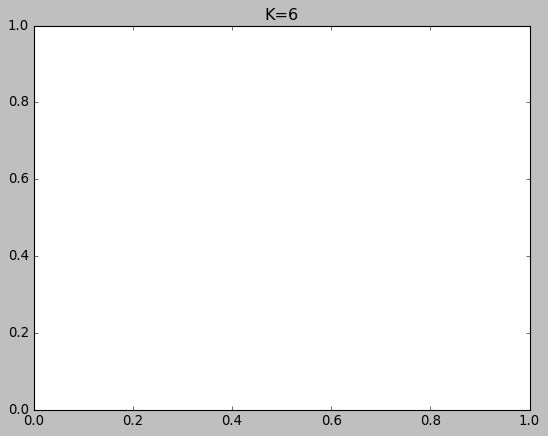

In [5]:
a,b=finaldf1.shape
#display(a,b)
FF={}
for i in range(1,a+1):
    V=df3
    newa=[]
    '''fig= plt.figure(figsize=(17,14))
    axes=fig.add_subplot(1,1,1)'''
    y=finaldf1.iloc[i-1:i].values[0]
    X = np.linspace(-3,3, len(y))
    from scipy.interpolate import make_lsq_spline, BSpline
    t = [-1, 0, 1]
    k = 6
    t = np.r_[(X[0],)*(k+1),t,(X[-1],)*(k+1)]
    spl = make_lsq_spline(X, y, t, k)
    from scipy.interpolate import make_interp_spline
    spl_i = make_interp_spline(X, y)
    xs = np.linspace(-3, 3, num)
    '''Xsca=spl(xs)
    xsca=Xsca.reshape(-1,1)
    min_max_scaler = preprocessing.MinMaxScaler((min(xsca)+abs(min(xsca)*0.5),max(xsca)*0.75))
    x_scaled = min_max_scaler.fit_transform(xsca)'''
    '''plt.plot(X, y, 'ro', ms=5)
    plt.plot(xs, spl(xs), 'g-', lw=3, label='LSQ spline')
    plt.plot(xs, spl_i(xs), 'b-', lw=3, alpha=0.7, label='interp spline')'''
    #plt.plot(xs,x_scaled,label='scaled')
    #plt.legend(loc='best')
    #display(spl(xs))
    #FF['L_{}'.format(i)]=x_scaled.flatten()
    FF['L_{}'.format(i)]=spl(xs)
    #print(spl(xs))
    #display(len(spl(xs)))
    #plt.show()
    plt.title('K={}'.format(k))
    #plt.savefig('W{}.png'.format(i))
Finaldf1=DataFrame(FF).transpose()
#display(Finaldf1)

In [6]:
Finaldf1

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
L_1,0.025599,0.025374,0.025164,0.024968,0.024785,0.024614,0.024456,0.024309,0.024174,0.024049,...,0.031032,0.030671,0.030284,0.029870,0.029427,0.028955,0.028454,0.027922,0.027358,0.026761
L_2,0.024051,0.023799,0.023549,0.023299,0.023051,0.022805,0.022561,0.022319,0.022080,0.021843,...,0.031272,0.030765,0.030235,0.029683,0.029109,0.028510,0.027888,0.027241,0.026570,0.025872
L_3,0.040466,0.040128,0.039804,0.039495,0.039199,0.038917,0.038648,0.038392,0.038148,0.037915,...,0.047836,0.047003,0.046120,0.045186,0.044198,0.043155,0.042056,0.040898,0.039680,0.038399
L_4,0.039837,0.039622,0.039418,0.039226,0.039044,0.038873,0.038711,0.038559,0.038416,0.038282,...,0.050314,0.049295,0.048211,0.047060,0.045840,0.044549,0.043184,0.041743,0.040223,0.038623
L_5,0.038912,0.038558,0.038240,0.037957,0.037707,0.037488,0.037299,0.037139,0.037005,0.036897,...,0.050645,0.049611,0.048512,0.047343,0.046104,0.044792,0.043404,0.041938,0.040391,0.038760
L_6,0.021740,0.021436,0.021149,0.020876,0.020619,0.020376,0.020146,0.019930,0.019727,0.019536,...,0.034064,0.033633,0.033173,0.032685,0.032167,0.031618,0.031037,0.030423,0.029775,0.029093
L_7,0.026519,0.026162,0.025819,0.025488,0.025170,0.024864,0.024570,0.024287,0.024017,0.023757,...,0.029832,0.030005,0.030182,0.030363,0.030549,0.030739,0.030935,0.031136,0.031342,0.031553


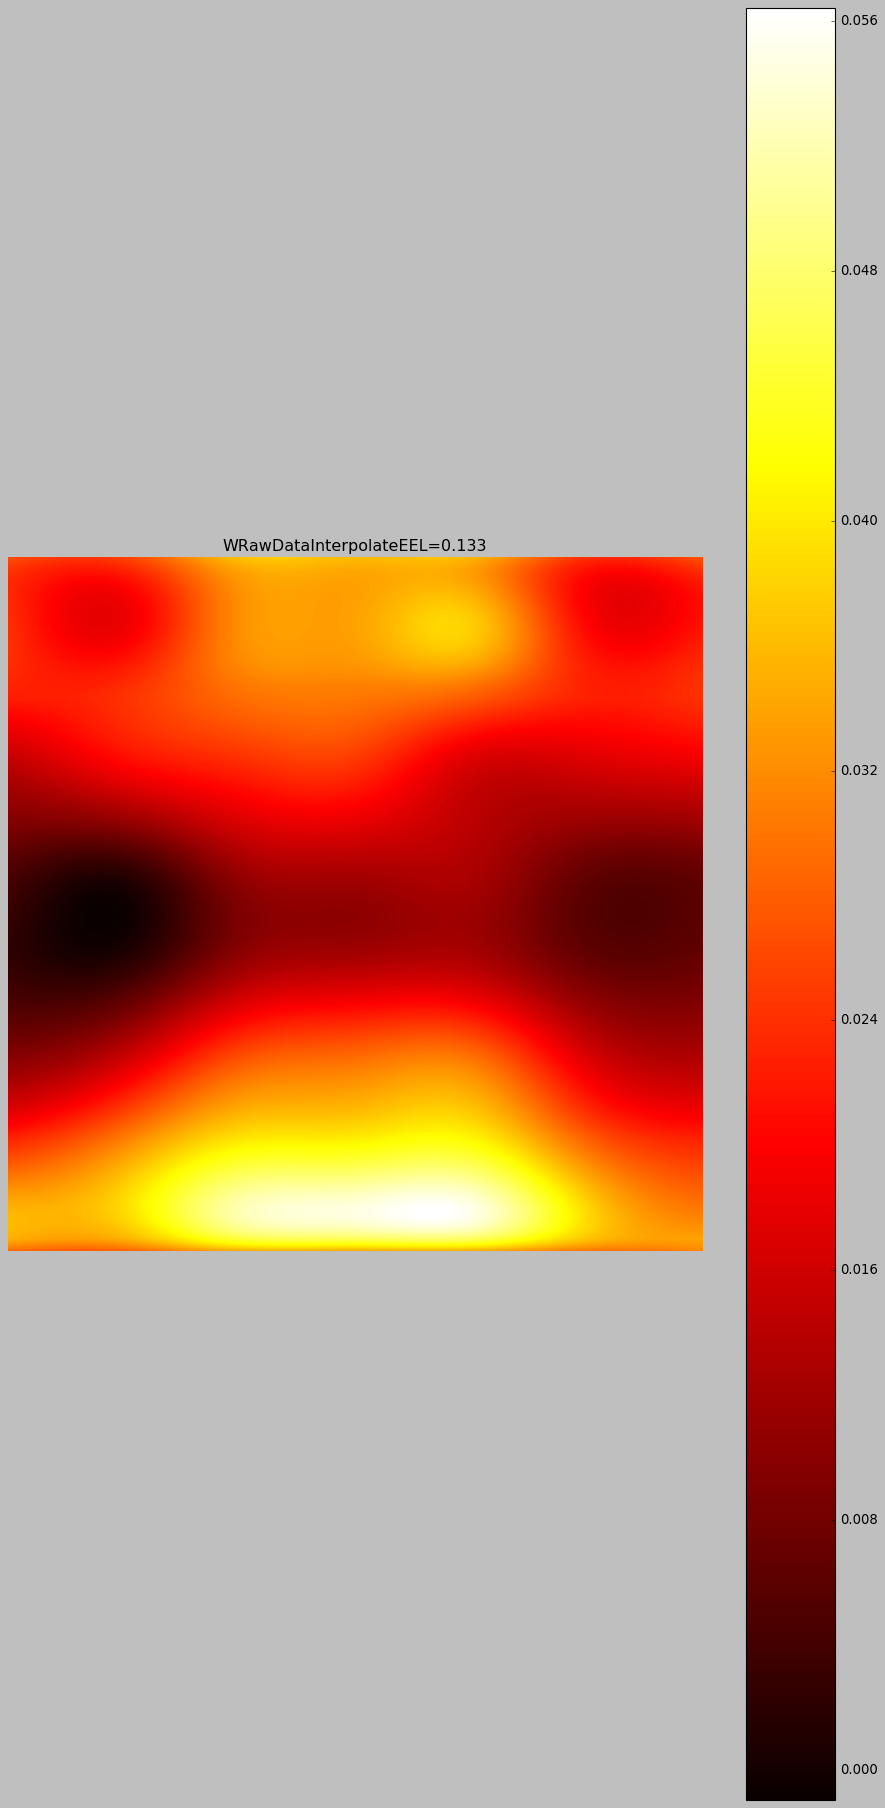

In [7]:
Pos=np.linspace(0,7,7)
R,C=Finaldf1.shape
angle=127
for j in range(1,round(R/7)+1):
    subnew1={}
    '''fig= plt.figure(figsize=(12,10))
    axes=fig.add_subplot(1,1,1)'''
    for i in range(1,C+1):
        qq=Finaldf1.iloc[(j-1)*7:j*7,i-1:i].values
        F = Rbf(Pos,qq,kind=typ)
        xnew=np.linspace(0,7,Num)
        XX=F(xnew).reshape(-1,1)
        min_max_scaler = preprocessing.MinMaxScaler((min(XX)+abs(min(XX)*0.15),max(XX)*0.9))
        X_scaled = min_max_scaler.fit_transform(XX)
        subnew1['{}'.format(i)]=X_scaled.flatten()
        '''plt.plot(X_scaled)
        plt.plot(F(xnew))'''
    dff=DataFrame(subnew1)
    dff.to_csv('r_A{}_EEL={}.csv'.format(typ,xzs[j-1]))
    dy=np.linspace(0,3100,Num)
    fig= plt.figure(figsize=(14,28))
    '''yy=dff.index
    img=plt.contourf(yy,dy,dff.transpose().values,cmap='hot')'''
    img=plt.imshow(dff.transpose().values,cmap='hot')
    plt.title('WRawDataInterpolateEEL={}'.format(xzs[j-1]))
    #plt.colorbar()
    plt.axis('off')
    plt.colorbar()
    '''for Nu in range(1,7):
        plt.axvline(x=Nu*60, ymin=0, ymax=1,linewidth=3, color='white')'''
    '''norm = colors.Normalize(vmin=-0.0009, vmax=0.015)
    img.set_norm(norm)'''
    #cv2.resize(img,(7,14),interpolation=cv2.INTER_AREA)
    plt.savefig('WColInter_{}.png'.format(j),bbox_inches='tight')

In [89]:
def loc(dff):
    k=[]
    l=[]
    for i in range (1,dff.shape[0]+1):
        z=dff.iloc[i-1:i].values[0]
        k.append(max(z))
        l.append(min(z))
    return max(k),min(l)

,position of change,Sign,Percent of change,Percent of cahnge row
0,"(588, 600)",+,1.1288775153333606%,-4.563757200289045%
1,"(576, 588)",+,0.6271853858596143%,-11.767582532943592%
2,"(564, 576)",+,0.4819115523569338%,-18.88939904259329%
3,"(552, 564)",+,0.5241796335843261%,-25.446758793678253%
4,"(540, 552)",+,0.6823676340556026%,-30.982215802607183%
5,"(528, 540)",+,0.7682073808032234%,-35.12341578016907%
6,"(516, 528)",+,0.8146347525171966%,-37.631416798217174%
7,"(504, 516)",+,0.8101053644512672%,-38.43578899593521%
8,"(492, 504)",+,0.8407608096005748%,-37.65093723088605%
9,"(480, 492)",+,0.7968973216610955%,-35.561612048459104%


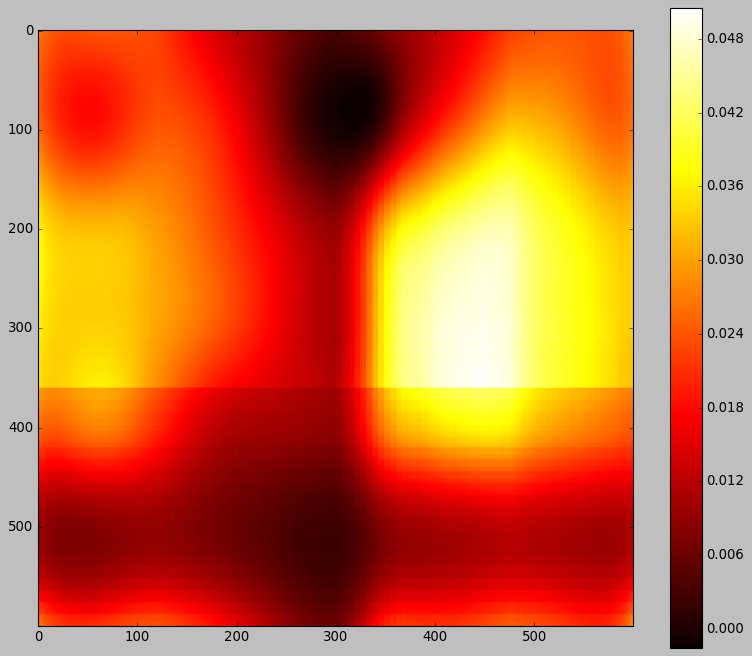

In [11]:
total={}
increment=0.02
inc=[]
pers=[]
pos=[]
perls=[]
fig= plt.figure(figsize=(12,10))
axes=fig.add_subplot(1,1,1)
for i in range(0,25):
    low=i*increment
    up=(i+1)*increment
    Value_low=dff.iloc[:,int(Num*low):int(Num*up)].values.flatten()[:10]
    Value_up=dff.iloc[:,int((1-up)*Num):int((1-low)*Num)].values.flatten()[:10]
    Value_left=dff.iloc[int(Num*low):int(Num*up)].values.flatten()[:10]
    Value_right=dff.iloc[int((1-up)*Num):int((1-low)*Num)].values.flatten()[:10]
    per=np.average((Value_up-Value_low)/Value_up)*-1
    perl=np.average((Value_left-Value_right)/Value_left)*-1
    pers.append(str(per*100)+'%')
    perls.append(str(perl*100)+'%')
    if per>0:
        inc.append('+')
    else:
        inc.append('-')
    dff.iloc[:,int((1-up)*Num):int((1-low)*Num)]+=per*dff.iloc[:,int((1-up)*Num):int((1-low)*Num)]
    dff.iloc[int((1-up)*Num):int((1-low)*Num)]+=perl*dff.iloc[int((1-up)*Num):int((1-low)*Num)]
    #display(dff.iloc[:,int((1-up)*Num):int((1-low)*Num)])
    pos.append((int((1-up)*Num),int((1-low)*Num)))
total['position of change']=pos
total['Sign']=inc
total['Percent of change']=pers
total['Percent of cahnge row']=perls
plt.imshow(dff.values,cmap='hot')
plt.colorbar()
Dff=dff.iloc[:,82:150]
Dff.to_csv('UU{}.csv'.format(j))
plt.savefig('KK1.png',bbox_inches='tight')
df=DataFrame(total)
display(df)

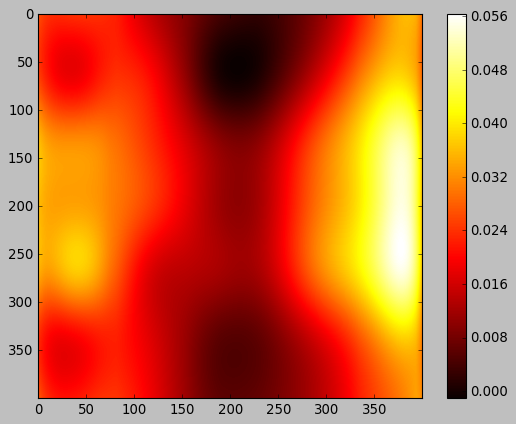

In [25]:
plt.imshow(dff.values,cmap='hot')
plt.colorbar()

,position of change_{},Sign_{},Percent of change{}
0,"(142, 150)",-,-40.972673
1,"(135, 142)",-,-58.725341
2,"(127, 135)",-,-44.086588
3,"(120, 127)",-,-31.415605
4,"(112, 120)",-,-1.695055
5,"(105, 112)",+,17.693689
6,"(97, 105)",+,109.724144
7,"(90, 97)",+,289.521756
8,"(82, 90)",+,243.443550


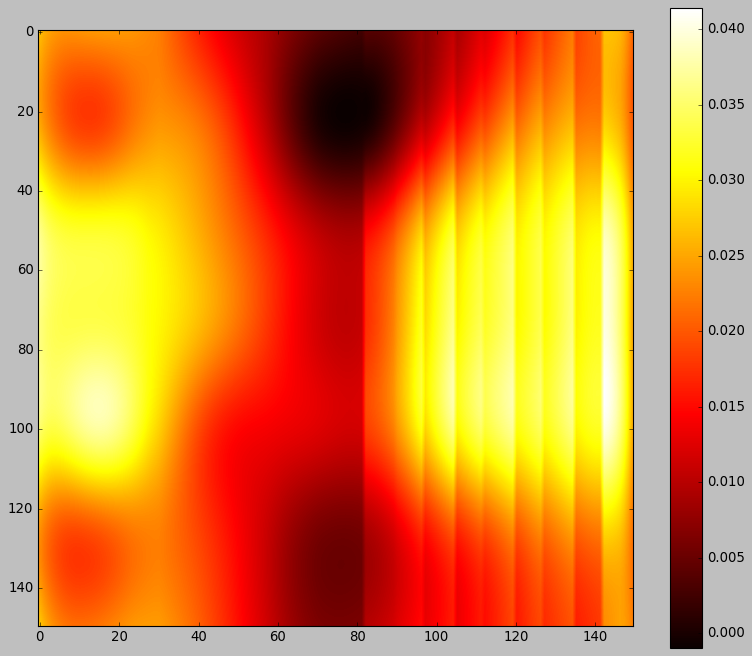

In [97]:
total={}
increment=0.05
inc=[]
pers=[]
pos=[]
fig= plt.figure(figsize=(12,10))
axes=fig.add_subplot(1,1,1)
for i in range(0,9):
    low=i*increment
    up=(i+1)*increment
    Value_low=dff.iloc[:,int(Num*low):int(Num*up)].values.flatten()[:700]
    Value_up=dff.iloc[:,int((1-up)*Num):int((1-low)*Num)].values.flatten()[:700]
    per=np.average((Value_up-Value_low)/Value_up)*-1
    pers.append(per*100)
    if per>0:
        inc.append('+')
    else:
        inc.append('-')
    dff.iloc[:,int((1-up)*Num):int((1-low)*Num)]+=per*dff.iloc[:,int((1-up)*Num):int((1-low)*Num)]
    #display(dff.iloc[:,int((1-up)*Num):int((1-low)*Num)])
    pos.append((int((1-up)*Num),int((1-low)*Num)))
total['position of change_{}']=pos
total['Sign_{}']=inc
total['Percent of change{}']=pers
plt.imshow(dff.values,cmap='hot')
plt.colorbar()
Dff=dff.iloc[:,82:150]
Dff.to_csv('UU{}.csv'.format(j))
plt.savefig('KK1.png',bbox_inches='tight')
df=DataFrame(total)
display(df)

,position of change_{},Sign_{},Percent of change{}
0,"(142, 150)",-,-7.084742
1,"(135, 142)",+,85.731618
2,"(127, 135)",-,-19.292237
3,"(120, 127)",-,-91.066203
4,"(112, 120)",-,-95.788379
5,"(105, 112)",-,-80.577181
6,"(97, 105)",-,-49.242670
7,"(90, 97)",+,59.506937
8,"(82, 90)",+,556.675355


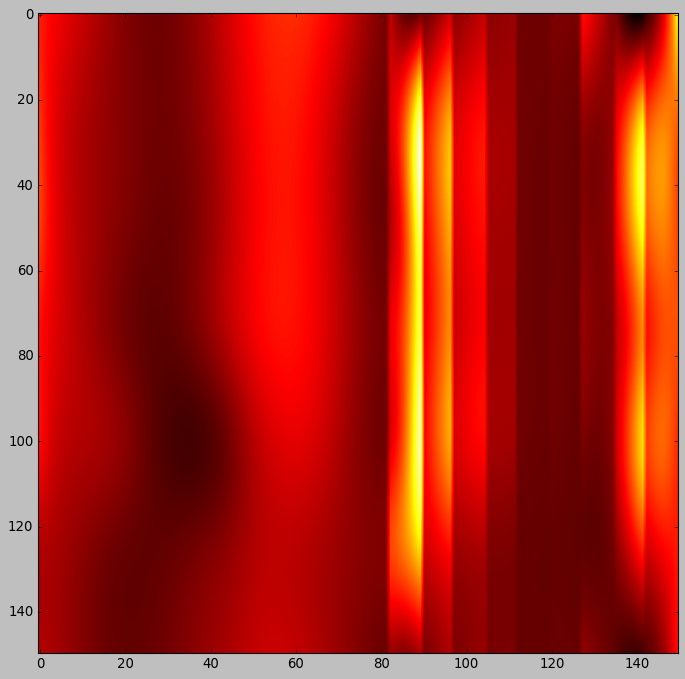

In [82]:
inc=[]
total={}
incrememnt=0.5
pers=[]
pos=[]
for i in range(0,9):
    low=i*increment
    up=(i+1)*increment
    Value_low=dff.iloc[:,int(Num*low):int(Num*up)].values.flatten()[:700]
    Value_up=dff.iloc[:,int((1-up)*Num):int((1-low)*Num)].values.flatten()[:700]
    per=np.average((Value_up-Value_low)/Value_up)*-1
    pers.append(per*100)
    if per>0:
        inc.append('+')
    else:
        inc.append('-')
    dff.iloc[:,int((1-up)*Num):int((1-low)*Num)]+=per*dff.iloc[:,int((1-up)*Num):int((1-low)*Num)]
    pos.append((int((1-up)*Num),int((1-low)*Num)))
total['position of change_{}']=pos
total['Sign_{}']=inc
total['Percent of change{}']=pers
df=DataFrame(total)
dff.update(dff)
display(df)
fig= plt.figure(figsize=(12,10))
axes=fig.add_subplot(1,1,1)
plt.imshow(dff.values,cmap='hot')